#   Линейная регрессия

In [43]:
import statsmodels
import scipy
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.graphics.regressionplots import plot_leverage_resid2
import matplotlib.pyplot as plt
import matplotlib.pylab as plot_plt
import seaborn as sns

In [2]:
raw = pd.read_csv("beauty.csv", sep=';', header=0, index_col=False)
raw.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


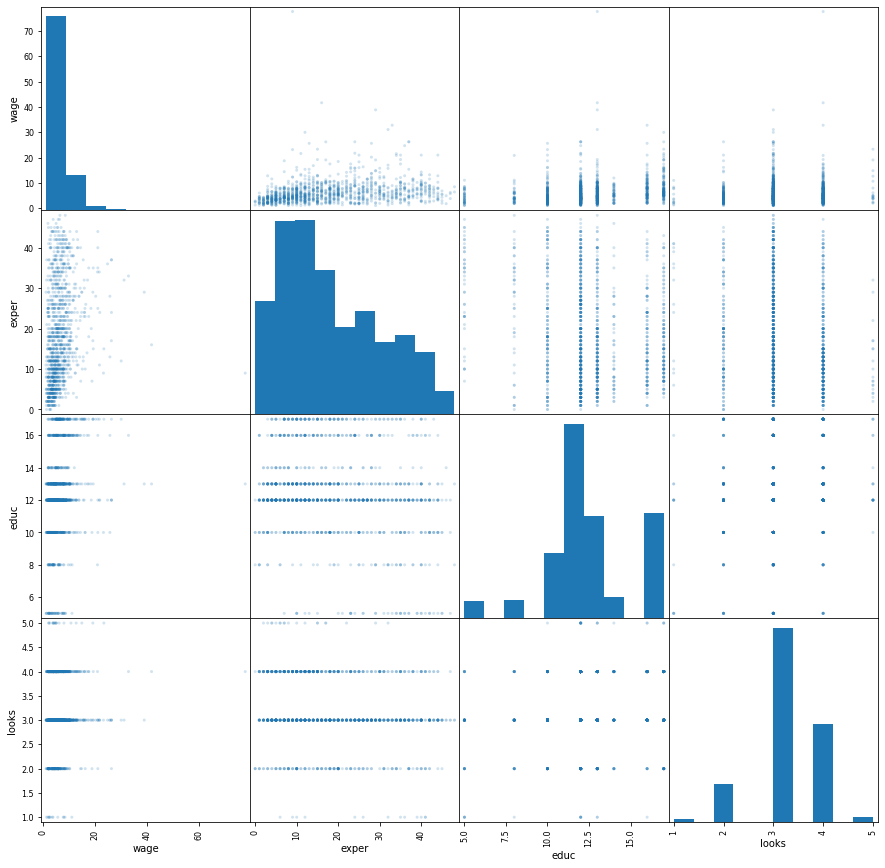

In [3]:
pd.plotting.scatter_matrix(raw[['wage', 'exper', 'educ', 'looks']], alpha=.2, figsize=(15,15), diagonal="hist")
plt.show()

In [4]:
#   Оценим сбалансированность выборки
print(raw.union.value_counts())
print('----')
print(raw.goodhlth.value_counts())
print('----')
print(raw.black.value_counts())
print('----')
print(raw.female.value_counts())
print('----')
print(raw.married.value_counts())
print('----')
print(raw.service.value_counts())

0    917
1    343
Name: union, dtype: int64
----
1    1176
0      84
Name: goodhlth, dtype: int64
----
0    1167
1      93
Name: black, dtype: int64
----
0    824
1    436
Name: female, dtype: int64
----
1    871
0    389
Name: married, dtype: int64
----
0    915
1    345
Name: service, dtype: int64


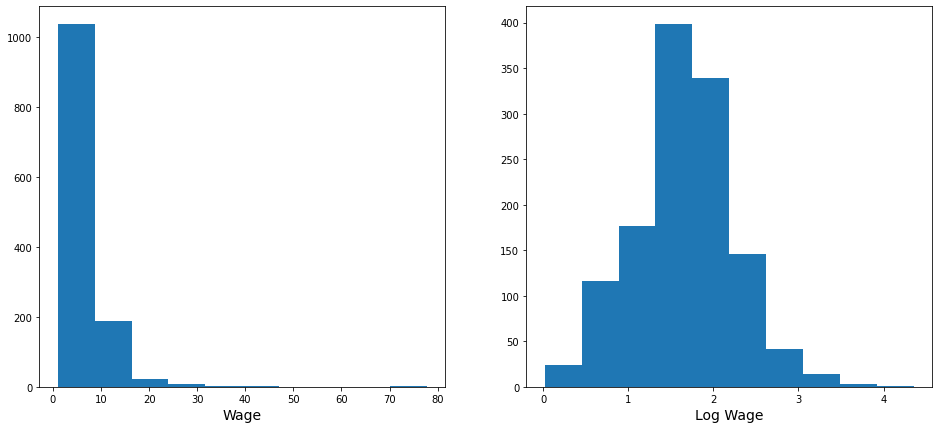

In [55]:
#   Обработка
data = raw
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.hist(data.wage)
plt.xlabel('Wage', fontsize=14)
plt.subplot(1,2,2)
plt.hist(np.log(data.wage))
plt.xlabel('Log Wage', fontsize=14)
plt.show()

In [56]:
data = data[data['wage'] < 77]

In [7]:
plt.figure(figsize=(10, 7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='looks'>

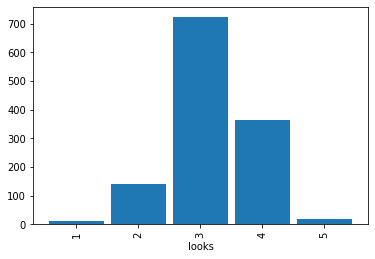

In [8]:
data.groupby(by='looks')['looks'].agg(lambda x: len(x)).plot(kind='bar', width=.9)

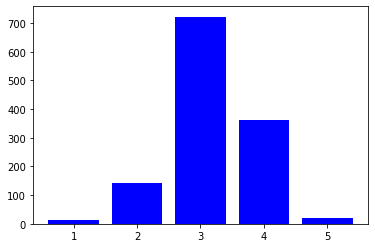

In [9]:
#   Alternative
plot_data = []
for _ in data['looks'].unique():
    plot_data.append((_, len(data[data['looks'] == _])))
plot_data = sorted(plot_data, key=lambda x: x[0])

for _ in plot_data:
    plt.bar(_[0], height=_[1], color='blue')

In [57]:
data['belowavg'] = data['looks'].apply(lambda x: 1 if x < 3 else 0)
data['aboveavg'] = data['looks'].apply(lambda x: 1 if x > 3 else 0)
data.head()

<ipython-input-57-32b5c4fb09f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['belowavg'] = data['looks'].apply(lambda x: 1 if x < 3 else 0)
<ipython-input-57-32b5c4fb09f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['aboveavg'] = data['looks'].apply(lambda x: 1 if x > 3 else 0)


,wage,exper,union,goodhlth,black,female,married,service,educ,looks,belowavg,aboveavg
0,5.73,30,0,1,0,1,1,1,14,4,0,1
1,4.28,28,0,1,0,1,1,0,12,3,0,0
2,7.96,35,0,1,0,1,0,0,10,4,0,1
3,11.57,38,0,1,0,0,1,1,16,3,0,0
4,11.42,27,0,1,0,0,1,0,16,3,0,0


In [11]:
model_1 = smf.ols('wage ~ exper + union + goodhlth + black + female + married + service + educ + belowavg + aboveavg', data=data)
fitted = model_1.fit()
print(fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     44.31
Date:                Mon, 09 Aug 2021   Prob (F-statistic):           1.42e-75
Time:                        03:51:39   Log-Likelihood:                -3402.9
No. Observations:                1259   AIC:                             6828.
Df Residuals:                    1248   BIC:                             6884.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.5898      0.743     -0.793      0.4

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


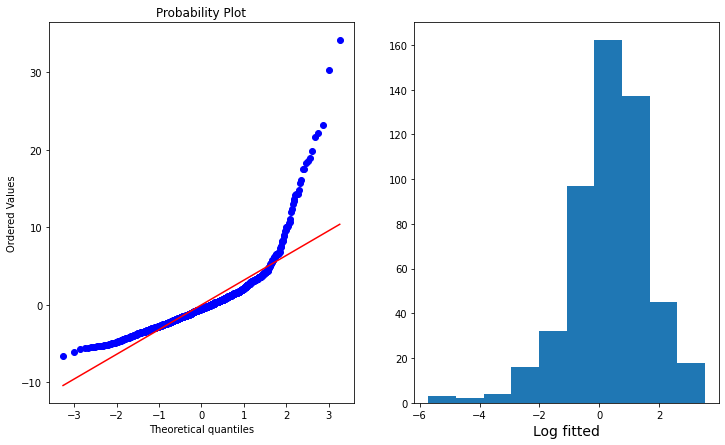

In [12]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(1,2,2)
plt.hist(np.log(fitted.resid))
plt.xlabel('Log fitted', fontsize=14)
plt.show()

In [13]:
scipy.stats.shapiro(fitted.resid)

ShapiroResult(statistic=0.7783821821212769, pvalue=3.247975543201691e-38)

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     77.63
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          1.18e-123
Time:                        03:51:40   Log-Likelihood:                -816.90
No. Observations:                1259   AIC:                             1656.
Df Residuals:                    1248   BIC:                             1712.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4515      0.095      4.737      0.0

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


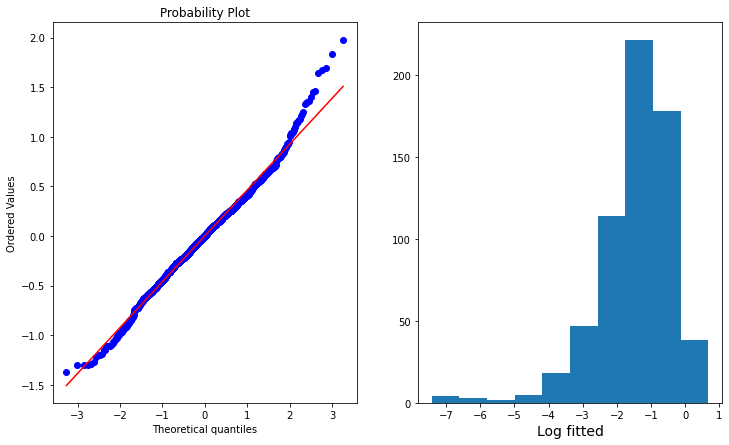

In [14]:
model_1 = smf.ols('np.log(wage) ~ exper + union + goodhlth + black + female + married + service + educ + belowavg + aboveavg', data=data)
fitted = model_1.fit()
print(fitted.summary())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(1,2,2)
plt.hist(np.log(fitted.resid))
plt.xlabel('Log fitted', fontsize=14)
plt.show()
print(scipy.stats.shapiro(fitted.resid))

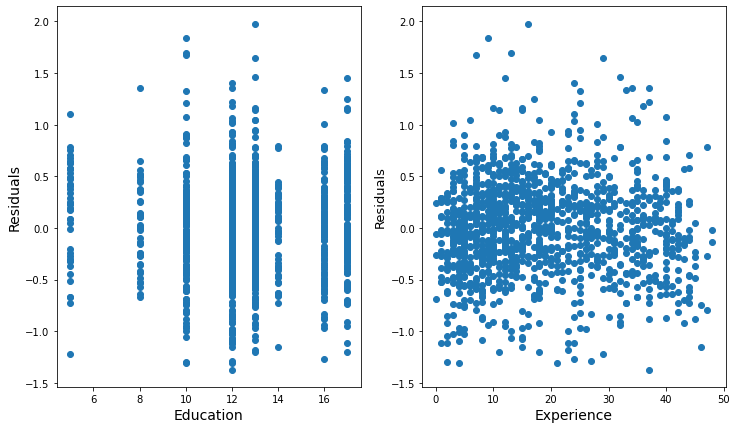

In [17]:
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.scatter(data['educ'], fitted.resid)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(1,2,2)
plt.scatter(data['exper'], fitted.resid)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Residuals', fontsize=13)
#   Видно параболу
plt.show()

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     76.46
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          3.19e-131
Time:                        04:00:40   Log-Likelihood:                -796.86
No. Observations:                1259   AIC:                             1618.
Df Residuals:                    1247   BIC:                             1679.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3424      0

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


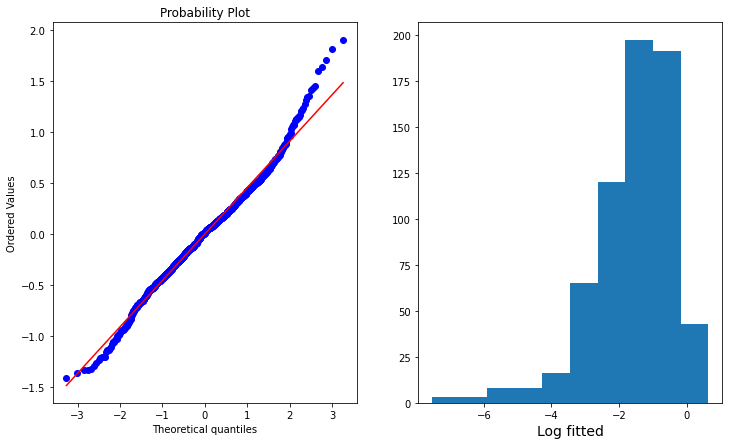

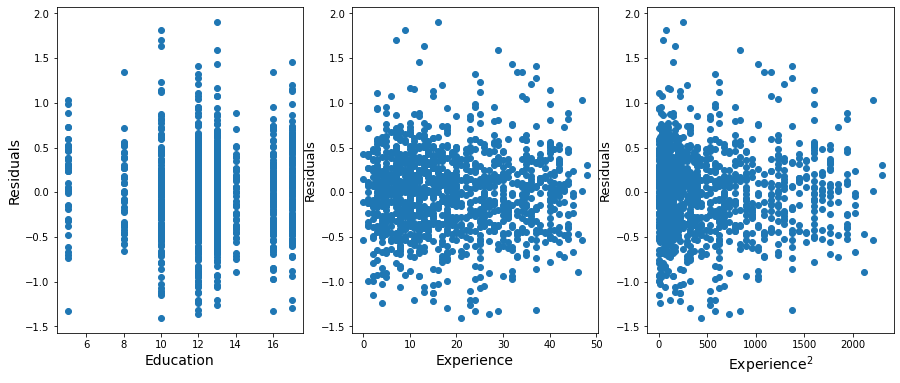

In [30]:
model_1 = smf.ols('np.log(wage) ~ exper + np.power(exper,2) +union + goodhlth + black + female + married + service + educ + belowavg + aboveavg', data=data)
fitted = model_1.fit()
print(fitted.summary())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(1,2,2)
plt.hist(np.log(fitted.resid))
plt.xlabel('Log fitted', fontsize=14)
plt.show()
print(scipy.stats.shapiro(fitted.resid))
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.scatter(data['educ'], fitted.resid)
plt.xlabel('Education', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.subplot(1,3,2)
plt.scatter(data['exper'], fitted.resid)
plt.xlabel('Experience', fontsize=14)
plt.ylabel('Residuals', fontsize=13)
plt.subplot(1,3,3)
plt.scatter(np.power(data['exper'], 2), fitted.resid)
plt.xlabel('Experience$^{2}$', fontsize=14)
plt.ylabel('Residuals', fontsize=13)
#   Видно параболу
plt.show()

Используем критерий Бройша-Пагана для проверки гомоскедастичности ошибок:

In [32]:
sms.het_breuschpagan(fitted.resid, fitted.model.exog)[1]
#   Проблема

4.192584368287557e-06

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     87.29
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          4.23e-146
Time:                        04:05:32   Log-Likelihood:                -796.86
No. Observations:                1259   AIC:                             1618.
Df Residuals:                    1247   BIC:                             1679.
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3424      0

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


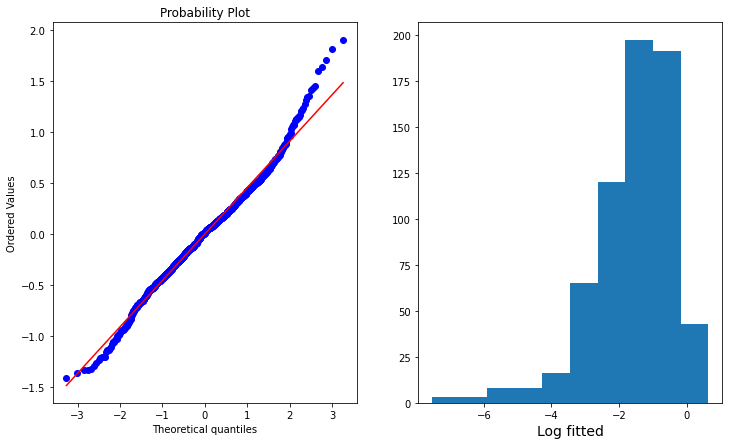

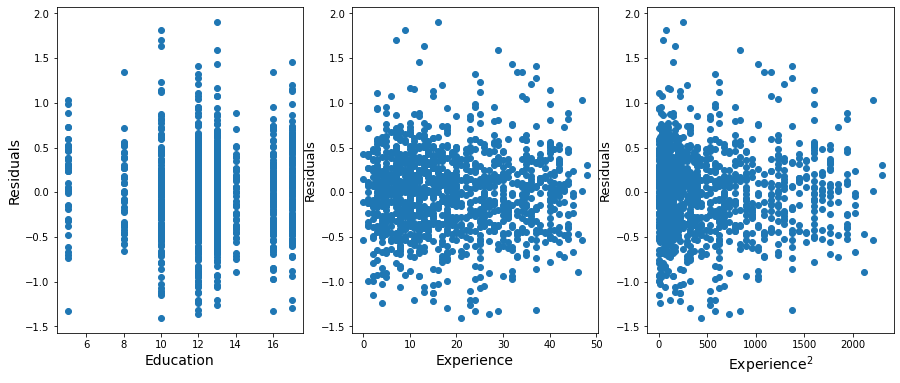

In [34]:
#   Сделаем поправку Уайта для того чтобы значимость признаков определялась корректно при критерии Стьюдента
model_2 = smf.ols('np.log(wage) ~ exper + np.power(exper,2) +union + goodhlth + black + female + married + service + educ + belowavg + aboveavg', data=data)
fitted = model_2.fit(cov_type="HC1")
print(fitted.summary())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(1,2,2)
plt.hist(np.log(fitted.resid))
plt.xlabel('Log fitted', fontsize=14)
plt.show()

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     121.1
Date:                Mon, 09 Aug 2021   Prob (F-statistic):          6.49e-150
Time:                        04:17:12   Log-Likelihood:                -799.30
No. Observations:                1259   AIC:                             1617.
Df Residuals:                    1250   BIC:                             1663.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3906      0

/Users/molozey/PycharmProjects/Coursera_Machine_2/venv/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


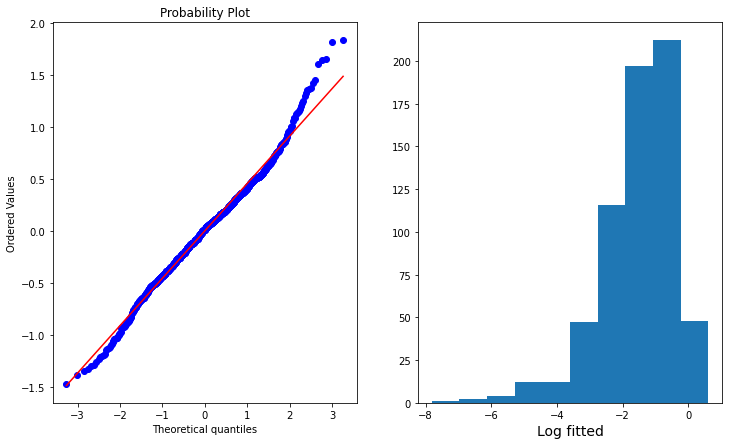

In [58]:
model_4 = smf.ols('np.log(wage) ~ exper + np.power(exper,2) +union + female + service + educ + belowavg + aboveavg', data=data)
fitted = model_4.fit(cov_type="HC1")
print(fitted.summary())
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
scipy.stats.probplot(fitted.resid, dist="norm", plot=plt)
plt.subplot(1,2,2)
plt.hist(np.log(fitted.resid))
plt.xlabel('Log fitted', fontsize=14)
plt.show()

In [37]:
#   Посмотрим что модель не стала хуже с помощью критерия Фишера
print(model_2.fit().compare_f_test(model_4.fit()))

(1.6114781116225334, 0.1849106730076289, 3.0)


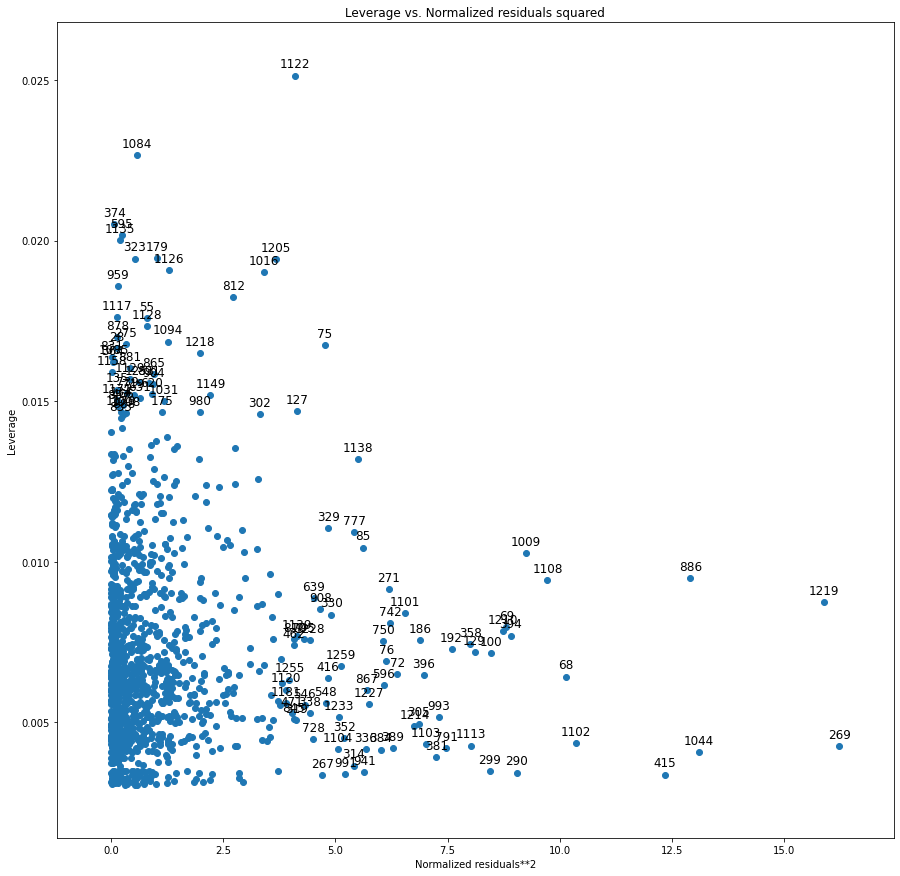

In [59]:
#   Проверим влиятельность удаленных от остальных точек
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))
plot_leverage_resid2(fitted, ax=ax)
plt.show()

In [65]:
data.loc[1122]

wage         6.25
exper       47.00
union        0.00
goodhlth     0.00
black        1.00
female       1.00
married      1.00
service      0.00
educ         5.00
looks        4.00
belowavg     0.00
aboveavg     1.00
Name: 1122, dtype: float64

In [66]:
data.loc[269]

wage        41.67
exper       16.00
union        0.00
goodhlth     0.00
black        0.00
female       0.00
married      1.00
service      0.00
educ        13.00
looks        4.00
belowavg     0.00
aboveavg     1.00
Name: 269, dtype: float64